<a href="https://colab.research.google.com/github/Andrian17/PythonDasar/blob/main/UAS_LogikaFuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UAS Logika Fuzzy** 
Nama :


1. Andrian
2. Alfi
3. Canggih







In [125]:
# lib
import math

In [126]:
# Permintaan
maxPermintaan = 840
minPermintaan = 180

# Persediaan
maxPersediaan = 140
minPersediaan = 60

# Produksi
maxProduksi = 738
minProduksi = 158


Diketahui

Pada tanggal 03 Januari 2023 Konveksi Al -Muslimah mendapatkan pesanan eragam sekolah ssebanyak 480 pesanan dan memiliki 86 persediaan di etalase, berapakah jumlah seragam yang harus di produksi jika diketahui 
Permintaan : 480
Persediaan : 86
Jumlah produksi = …….?


**Penyelesaian**

In [127]:
soalPermintaan = 480
soalPersediaan = 86

In [128]:
# Mendefinisikan Variabel

# V1 Permintaan ==> Naik dan Turun
def permintaanTurun () : 
  X = soalPermintaan
  pmtTurun = (maxPermintaan - X) / (maxPermintaan - minPermintaan)
  kondisi = 0
  if X <= minPermintaan :
    kondisi : 1
  elif X >= maxPermintaan :
    kondisi : 0
  return {
      'hasil' : round(pmtTurun, 4),
      'kondisi' : kondisi
  }
print(permintaanTurun())

def permintaanNaik () : 
  X = soalPermintaan
  pmtNaik = (X - minPermintaan) / (maxPermintaan - minPermintaan)
  kondisi = 0
  if X <= minPermintaan :
    kondisi = 0
  elif X >= maxPermintaan :
    kondisi : 1
  return {
      'hasil' : round(pmtNaik, 4),
      'kondisi' : kondisi
  }
print(permintaanNaik())

{'hasil': 0.5455, 'kondisi': 0}
{'hasil': 0.4545, 'kondisi': 0}


In [129]:
# V2 Persediaan ==> Banyak dan Sedikit
def persediaanSedikit () :
  Y = soalPersediaan
  psdSedikit = (maxPersediaan - Y) / (maxPersediaan - minPersediaan)
  kondisi = 0
  if Y <= minPersediaan :
    kondisi = 1
  elif Y >= 250 :
    kondisi = 0
  return {
      'hasil' : round(psdSedikit, 4),
      'kondisi' : kondisi
  }
print(persediaanSedikit())

def persediaanBanyak () : 
  Y = soalPersediaan
  psdBanyak = (Y - minPersediaan) / (maxPersediaan - minPersediaan)
  kondisi = 0
  if Y <= minPersediaan :
    kondisi = 0
  elif Y >= 250 :
    kondisi = 1
  return {
      'hasil' : round(psdBanyak, 4),
      'kondisi' : kondisi
  }
print(persediaanBanyak())

{'hasil': 0.675, 'kondisi': 0}
{'hasil': 0.325, 'kondisi': 0}


Fungsi keanggotaan dari variabel produksi (BERTAMBAH, BERKURANG)

Z= ……..?????

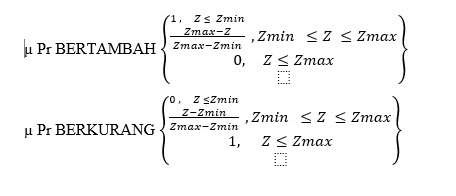

terdiri dari 2 himpunan fuzzy, yaitu BERKURANG dan BERTAMBAH. Fungsi keanggotaan himpunan fuzzy BERKURANG dan BERTAMBAH :

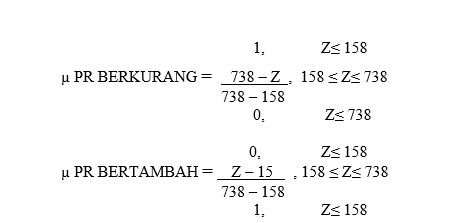

Z= adalah berapa jumlah yang di produksi perusahan ?



# **Inferensi**

[R1] JIKA Permintaan TURUN, dan Persediaan BANYAK, MAKA
Produksi Barang BERKURANG.

[R2] JIKA Permintaan TURUN, dan Persediaan SEDIKIT, MAKA
Produksi Barang BERKURANG.

[R3] JIKA Permintaan NAIK, dan Persediaan BANYAK, MAKA
Produksi Barang BERTAMBAH.

[R4] JIKA Permintaan NAIK, dan Persediaan SEDIKIT, MAKA
Produksi Barang BERTAMBAH.

In [130]:
# Inisialisasi varabel
alfa1 = 0
alfa2 = 0
alfa3 = 0
alfa4 = 0

In [131]:
# R1
def rule1 () :
  res = min(permintaanTurun()['hasil'], persediaanBanyak()['hasil'])
  global alfa1
  alfa1 = res

  Zmax = maxProduksi
  Zmin = minProduksi
  
  Z1 = Zmax - (alfa1 * (Zmax - Zmin))
  return round(Z1, 4)
print(rule1())

549.5


In [132]:
# R2 
def rule2 () : 
  res = min(permintaanTurun()['hasil'], persediaanSedikit()['hasil'])
  global alfa2
  alfa2 = res

  Zmax = maxProduksi
  Zmin = minProduksi

  Z2 = Zmax - (alfa2 * (Zmax - Zmin))
  return round(Z2, 4)
print(rule2())

421.61


In [133]:
# R3 
def rule3 () : 
  res = min(permintaanNaik()['hasil'], persediaanBanyak()['hasil'])
  global alfa3
  alfa3 = res

  Zmax = maxProduksi
  Zmin = minProduksi

  Z3 = alfa3 * (Zmax - Zmin) + Zmin
  return round(Z3, 4)
print(rule3())

346.5


In [134]:
# R4 
def rule4 () : 
  res = min(permintaanNaik()['hasil'], persediaanSedikit()['hasil'])
  global alfa4
  alfa4 = res

  Zmax = maxProduksi
  Zmin = minProduksi

  Z4 = alfa4 * (Zmax - Zmin) + Zmin
  return round(Z4, 4)
print(rule4())

421.61


**Defuzzifakasi**

Pada metode tsukamoto, untuk menentukan output crisp, digunakan defuzifikasi
rata-rata terpusat, yaitu :

In [135]:
# Defuzzfikasi
Z1 = rule1()
Z2 = rule2()
Z3 = rule3()
Z4 = rule4()

def defuzzfikasi () :

  alfaGabungan = round(alfa1 + alfa2 + alfa3 + alfa4, 4)
  ZGabungan = round(alfa1 * Z1 + alfa2 * Z2 + alfa3 * Z3 + alfa4 * Z4, 4)

  Zhasil = ZGabungan / alfaGabungan
  return round(Zhasil, 4)

print(defuzzfikasi())


432.0061


In [136]:
hasil = defuzzfikasi()
print(f"Jadi Jumlah Barang yang di produksi menurut Metode Tsukamoto adalah {hasil} kemasan.")

Jadi Jumlah Barang yang di produksi menurut Metode Tsukamoto adalah 432.0061 kemasan.
